# import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier



# result

all the data

Accuracy: 62.33%

 Training Accuracy score: 0.6251881769781531
Testing Accuracy score: 0.6232927008371273
classification_report 
               precision    recall  f1-score   support

           0       0.47      0.90      0.62      2309
           1       0.91      0.48      0.63      4500

    accuracy                           0.62      6809
   macro avg       0.69      0.69      0.62      6809
weighted avg       0.76      0.62      0.62      6809



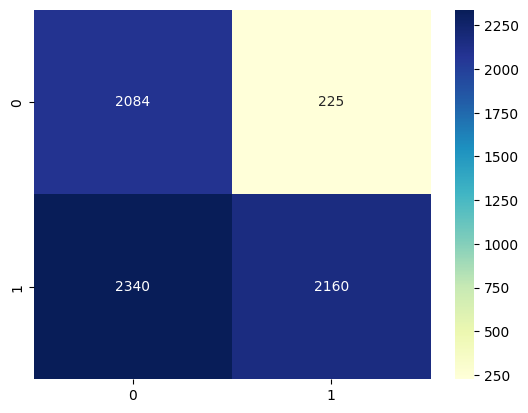

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
# tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
# x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf= MLPClassifier( max_iter=1000 )
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

standardizing

Accuracy: 86.65%

 Training Accuracy score: 0.8815861942353589
Testing Accuracy score: 0.8665002202966662
classification_report 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      2309
           1       0.90      0.90      0.90      4500

    accuracy                           0.87      6809
   macro avg       0.85      0.85      0.85      6809
weighted avg       0.87      0.87      0.87      6809



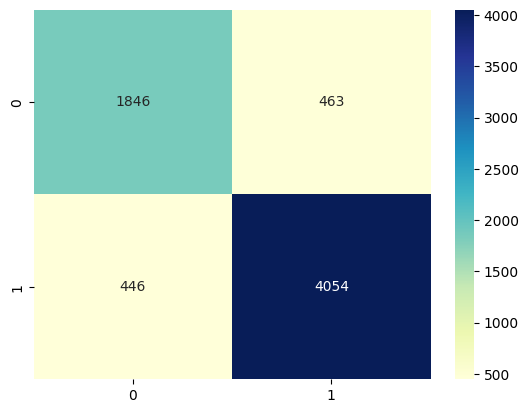

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('./Data/data+column_relation.csv')
# tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
0
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

random undersampling  + Standardizing

In [4]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.neural_network import MLPClassifier
# df = pd.read_csv('./Data/datavf.csv')

# x=df.iloc[:, :-2]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('scaler', StandardScaler()), # Standardizing the data
#     ('pca', PCA()), # Transforming the data with PCA
#     ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

random undersampling 

In [5]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.neural_network import MLPClassifier
# df = pd.read_csv('./Data/datavf.csv')

# x=df.iloc[:, :-2]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()


TomekLinks undersimpling 

Accuracy: 87.48%

 Training Accuracy score: 0.8851100092965603
Testing Accuracy score: 0.8748063216609855
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      2309
           1       0.88      0.93      0.90      4145

    accuracy                           0.87      6454
   macro avg       0.87      0.85      0.86      6454
weighted avg       0.87      0.87      0.87      6454



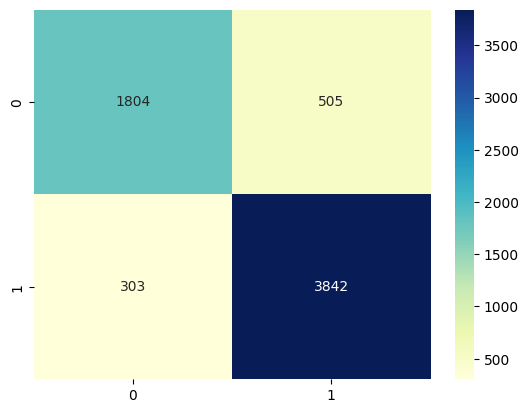

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomlink + random undersimpling

In [7]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# import gender_guesser.detector as gender

# import matplotlib.pyplot as plt 
# from datetime import datetime
# from sklearn import metrics
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# from imblearn.under_sampling import TomekLinks
# df = pd.read_csv('./Data/data+descvf.csv')
# tl = TomekLinks()
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()

# x, y = tl.fit_resample(x, y)
# # Convert the list to a DataFrame
# y = pd.DataFrame({'account_type': y})

# # Concatenate the two DataFrames
# data = pd.concat([x, y], axis=1)
# df1=data[data.account_type== 1].head(11543)
# df2=data[data.account_type== 0].head(11543)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

# clf = Pipeline([
#     ('scaler', StandardScaler()), # Standardizing the data
#     ('pca', PCA()), # Transforming the data with PCA
#     ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# clf.fit(x_train, y_train)
# score = clf.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = clf.predict(x_train)
# y_pred_test = clf.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

oversampling

Accuracy: 86.22%

 Training Accuracy score: 0.8712257992833532
Testing Accuracy score: 0.8622375291634263
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4501
           1       0.85      0.88      0.86      4500

    accuracy                           0.86      9001
   macro avg       0.86      0.86      0.86      9001
weighted avg       0.86      0.86      0.86      9001



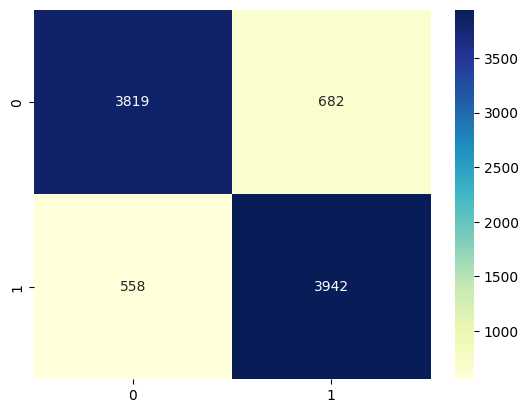

In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+descvf.csv')

smote = SMOTE(random_state=10)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y =smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with column relation

-oversimpling

Accuracy: 86.38%

 Training Accuracy score: 0.8815588455876225
Testing Accuracy score: 0.8637929118986779
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4501
           1       0.86      0.87      0.87      4500

    accuracy                           0.86      9001
   macro avg       0.86      0.86      0.86      9001
weighted avg       0.86      0.86      0.86      9001



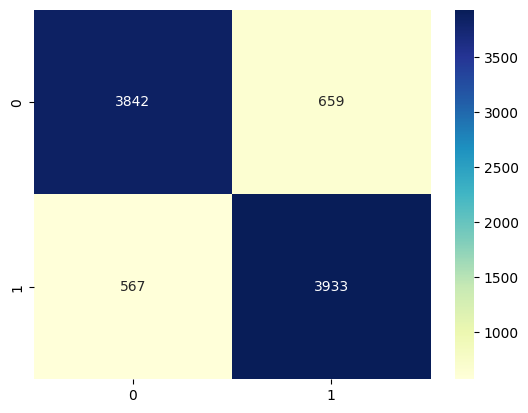

In [9]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+column_relation.csv')
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

-random undersimpling

In [10]:

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# import gender_guesser.detector as gender
# import matplotlib.pyplot as plt 
# from datetime import datetime
# from sklearn import metrics
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# data1 = pd.read_csv('./Data/data+column_relation.csv')

# df1=data1[data1.account_type== 1].head(11000)
# df2=data1[data1.account_type== 0].head(11000)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('scaler', StandardScaler()), # Standardizing the data
#     ('pca', PCA()), # Transforming the data with PCA
#     ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)
# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

tomklink undersimpling

Accuracy: 87.77%

 Training Accuracy score: 0.8911464201079989
Testing Accuracy score: 0.8777190801740211
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2309
           1       0.90      0.91      0.91      4127

    accuracy                           0.88      6436
   macro avg       0.87      0.86      0.87      6436
weighted avg       0.88      0.88      0.88      6436



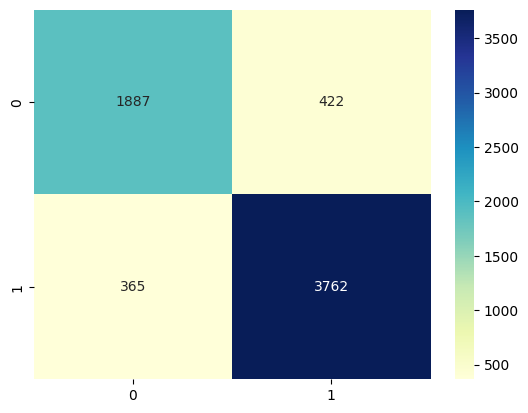

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+column_relation.csv')

tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# with features selection

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]

# followers/lastpost - followers :negative 
# engagment rate - followers :positive 
# following - following/years:negative
# followers/lastpost - engagment rate : negative 
# tweet by houre -tweet by day : positive 


# 'verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week', 'following/years', 'followers/lastpost',
#        'engagment_rate', 'description', 'screen_name', 'account_type'

# df=df.loc[:,['verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week','description','screen_name','account_type']]



- random undersimpling 

In [13]:
# df1=data1[data1.account_type== 1].head(11000)
# df2=data1[data1.account_type== 0].head(11000)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('scaler', StandardScaler()), # Standardizing the data
#     ('pca', PCA()), # Transforming the data with PCA
#     ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

- oversimpling

Accuracy: 85.57%

 Training Accuracy score: 0.8654481819949446
Testing Accuracy score: 0.8556827019220087
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4501
           1       0.86      0.86      0.86      4500

    accuracy                           0.86      9001
   macro avg       0.86      0.86      0.86      9001
weighted avg       0.86      0.86      0.86      9001



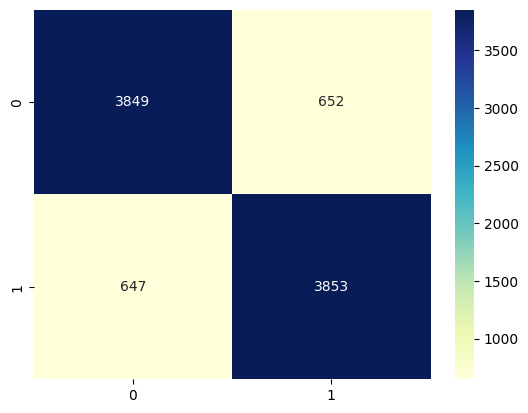

In [14]:
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 87.09%

 Training Accuracy score: 0.8806383642890588
Testing Accuracy score: 0.8709425717852685
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      2309
           1       0.88      0.92      0.90      4099

    accuracy                           0.87      6408
   macro avg       0.86      0.85      0.86      6408
weighted avg       0.87      0.87      0.87      6408



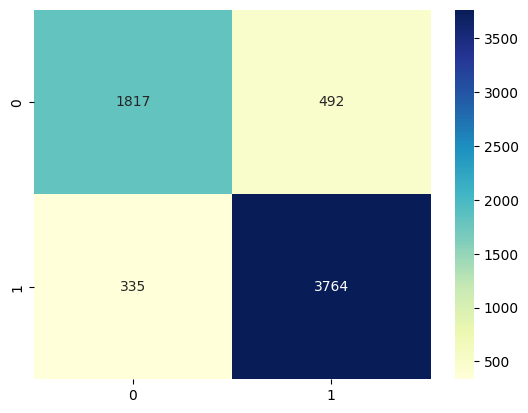

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# hyperparametre


In [ ]:
from sklearn.model_selection import GridSearchCV
# Creating lists of parameter for LogisticRegression


df = pd.read_csv('./Data/data+column_relation.csv')
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x,y =smote.fit_resample(x,y)
# Définir les paramètres pour MLPClassifier
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (20,), (30,)],
    'mlp__activation': ['logistic', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__learning_rate': ['constant', 'adaptive']
}




pipe = Pipeline([
    ('scaler', StandardScaler()),
     ('pca', PCA()),
    ('mlp',MLPClassifier( max_iter=1000 ))
])

from sklearn.model_selection import GridSearchCV

clf_GS = GridSearchCV(pipe, param_grid=param_grid, cv = 3)

# Fitting the grid search
clf_GS.fit(x, y)

clf_GS.best_params_

{'mlp__activation': 'logistic',
 'mlp__hidden_layer_sizes': (20,),
 'mlp__learning_rate': 'constant',
 'mlp__solver': 'sgd'}

Accuracy: 88.70%

 Training Accuracy score: 0.8855113636363636
Testing Accuracy score: 0.8870454545454546
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      2200
           1       0.85      0.93      0.89      2200

    accuracy                           0.89      4400
   macro avg       0.89      0.89      0.89      4400
weighted avg       0.89      0.89      0.89      4400



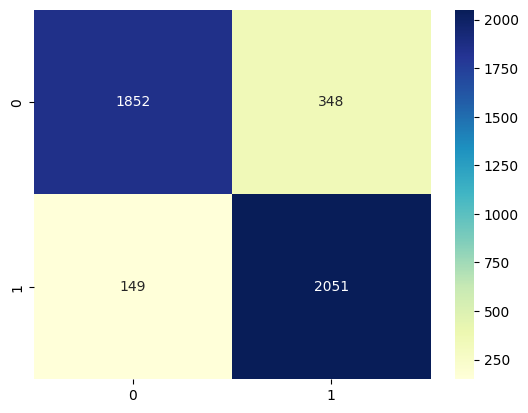

In [24]:
# {'mlp__activation': 'logistic',
#  'mlp__hidden_layer_sizes': (20,),
#  'mlp__learning_rate': 'constant',
#  'mlp__solver': 'sgd'}
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+column_relation.csv')
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x,y =smote.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier(activation='logistic',hidden_layer_sizes=(20,),learning_rate='constant',solver='sgd', random_state=42,max_iter=1000)) 
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#  cross validation

undersimpling

In [2]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# import gender_guesser.detector as gender
# import matplotlib.pyplot as plt 
# from datetime import datetime
# from sklearn import metrics
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import KFold, cross_val_score
# from imblearn.over_sampling import SMOTE
# from sklearn.pipeline import Pipeline

# data1 = pd.read_csv('./Data/data+column_relation.csv')

# df1=data1[data1.account_type== 1].head(11000)
# df2=data1[data1.account_type== 0].head(11000)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()

# k_folds = KFold(n_splits = 10)
# clf = Pipeline([
#      ('scaler', StandardScaler()), # Standardizing the data
#     ('pca', PCA()), 
#     ('rf', MLPClassifier( max_iter=1000,random_state=42 )) # Training a random forest classifier on the data
# ])
# scores = cross_val_score(clf, x, y, cv = k_folds)

# print("Average CV Score: ", scores.mean())


Average CV Score:  0.7137272727272727


oversimpling

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
data1 = pd.read_csv('./Data/data+column_relation.csv')
x=data1.iloc[:, :-3]
y = data1.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 5)
clf = Pipeline([
     ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), 
    ('rf', MLPClassifier( max_iter=1000,random_state=42 )) # Training a random forest classifier on the data
])
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())


Average CV Score:  0.7783002678714711
